# 🔍 Edge Detection

| **Method** | **Variant / Parameters** | **Explanation** | **Advantages** | **Disadvantages** |
|-------------|---------------------------|------------------|----------------|-------------------|
| **Sobel** | `ksize = 3`, `ksize = 5`, `ksize = 7` | Calculates image gradient in both X and Y directions to find intensity changes. Larger kernels smooth edges but reduce fine details. | Good for detecting soft gradients and rounded edges. | Larger kernels may blur small or fine edges. |
| **Laplacian** | `ksize = 3`, `ksize = 5`, `ksize = 7` | Detects edges based on the second derivative of intensity, independent of direction. | Captures edges in all directions simultaneously. | Very sensitive to noise; small intensity variations can produce false edges. |
| **Canny** | Thresholds: `(50,100)`, `(100,200)`, `(150,250)` | Uses a two-threshold approach with non-maximum suppression for precise edge tracing. Lower thresholds increase sensitivity. | Produces sharp and accurate edges with low noise. | Requires manual tuning of thresholds for optimal performance. |

---

### 🧩 Notes:
- For **bun height detection**, the most reliable edge outlines come from:
  - **Sobel (ksize=5)** → balanced smoothing and accuracy.
  - **Canny (100,200)** → sharp, noise-resistant edges.
- Apply **Gaussian Blur** before edge detection if the image contains noise:

```python
img_blur = cv2.GaussianBlur(img, (5,5), 0)

| **Method**          | **Description**                                                              | **Kernel / Threshold**        | **Characteristics**                                 | **Visual Observation**                                |
| ------------------- | ---------------------------------------------------------------------------- | ----------------------------- | --------------------------------------------------- | ----------------------------------------------------- |
| **Original Image**  | Base reference image before edge detection.                                  | —                             | Contains raw color and texture information.         | Used as comparison baseline for all filters.          |
| **Sobel (k=3)**     | Gradient-based operator detecting horizontal and vertical intensity changes. | Kernel size = 3               | Produces clear but slightly coarse edges.           | Captures strong boundaries but with less smoothness.  |
| **Sobel (k=5)**     | Same operator with a larger kernel.                                          | Kernel size = 5               | Smoother gradients, slightly thicker edges.         | Edge lines are broader, noise reduced slightly.       |
| **Sobel (k=7)**     | Even larger Sobel kernel.                                                    | Kernel size = 7               | Highest smoothing, but details may blur.            | Some fine edges disappear; overall structure remains. |
| **Laplacian (k=3)** | Second-order derivative operator emphasizing rapid intensity changes.        | Kernel size = 3               | Sensitive to noise, highlights fine details.        | Produces thin but noisy edges.                        |
| **Laplacian (k=5)** | Larger kernel for more smoothing.                                            | Kernel size = 5               | Reduces noise while maintaining structure.          | Edges become more defined and less speckled.          |
| **Laplacian (k=7)** | Very smooth Laplacian filter.                                                | Kernel size = 7               | Removes small details; focuses on broader contours. | Coarse outline with less high-frequency noise.        |
| **Canny (50–100)**  | Multi-stage gradient detector using thresholding.                            | Lower threshold pair (50–100) | Detects fine edges but includes noise.              | Many small edges appear; good for thin structures.    |
| **Canny (100–200)** | Balanced threshold range.                                                    | Mid threshold pair (100–200)  | Good trade-off between sensitivity and precision.   | Most clear and stable edges.                          |
| **Canny (150–250)** | High thresholds for stronger edges only.                                     | High threshold pair (150–250) | Ignores weak edges, emphasizes strong outlines.     | Only dominant edges remain; clean but less detailed.  |

## Libraries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## Edge Detection Method Comparison

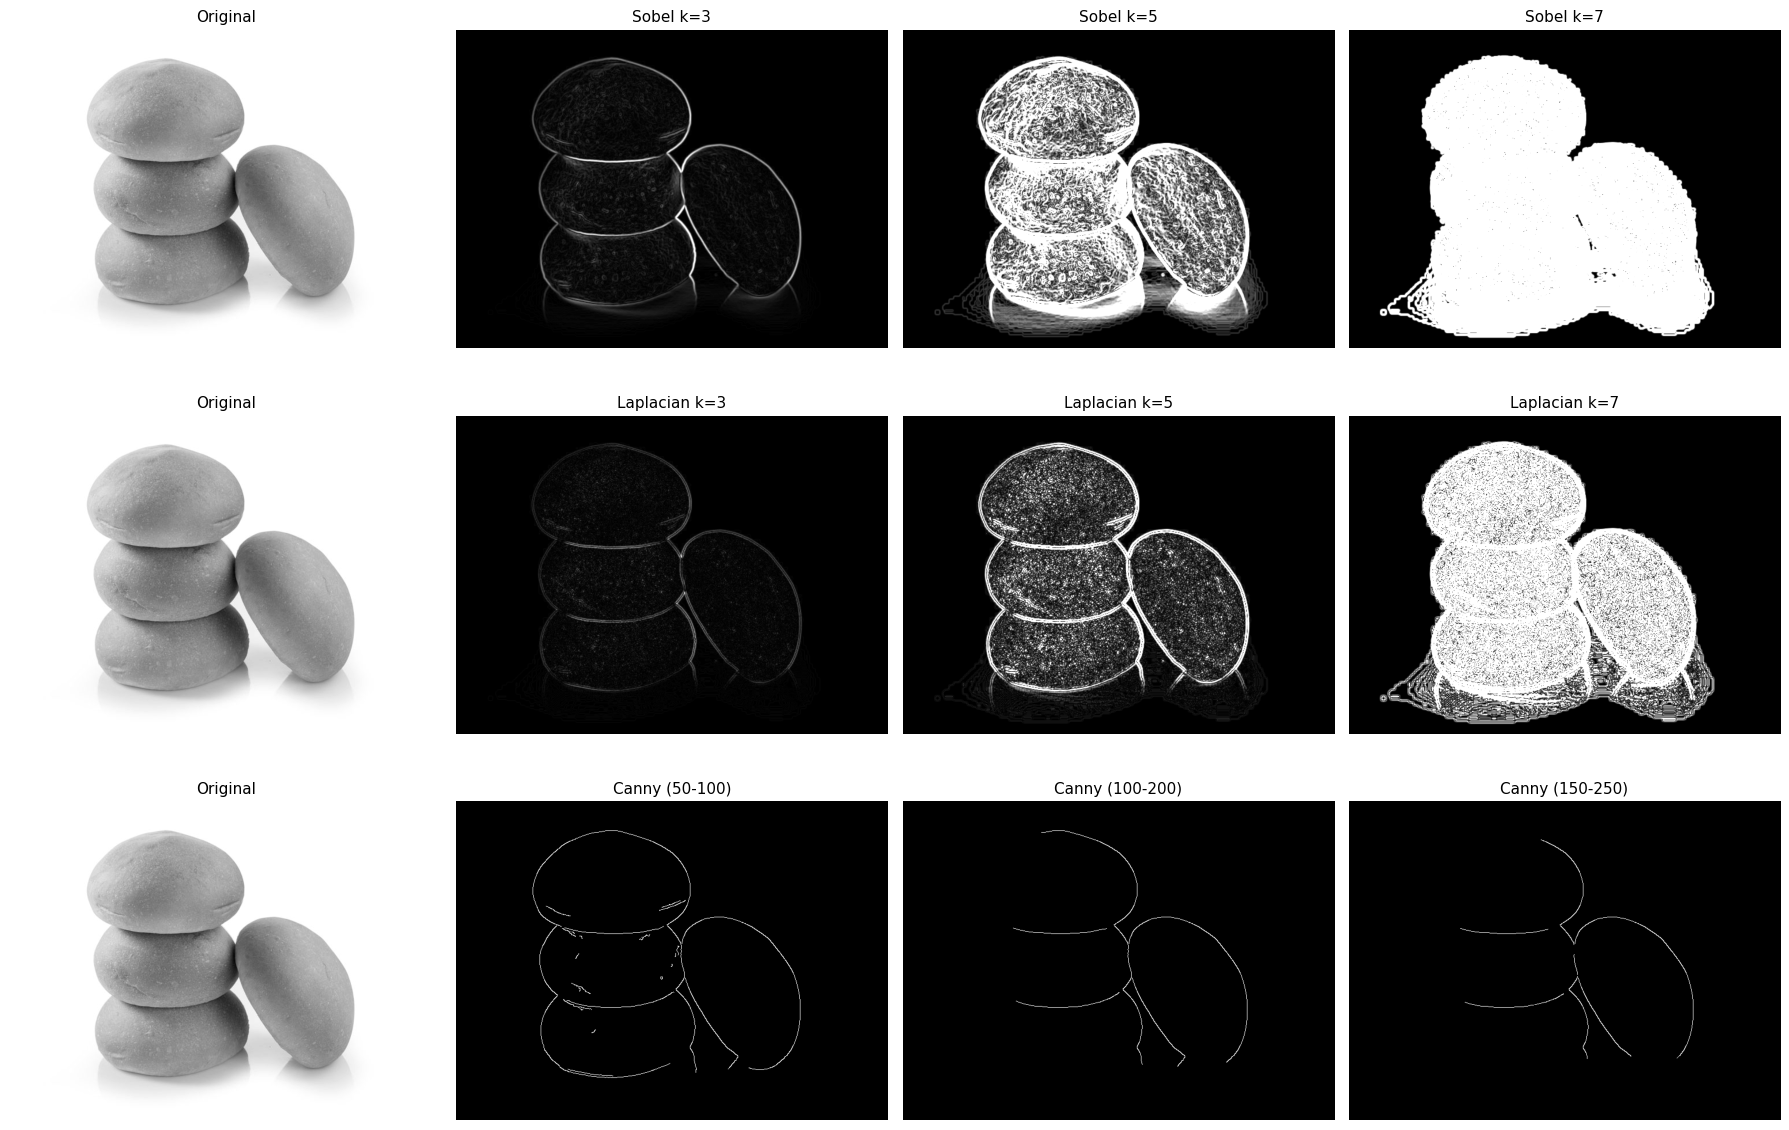

In [14]:
# Fungsi untuk menampilkan citra dalam grid 3x4
def display_comparison_grid(original, sobel_list, lap_list, canny_list, cmap='gray'):
    images = [
        original, sobel_list[0], sobel_list[1], sobel_list[2],
        original, lap_list[0], lap_list[1], lap_list[2],
        original, canny_list[0], canny_list[1], canny_list[2]
    ]
    titles = [
        'Original', 'Sobel k=3', 'Sobel k=5', 'Sobel k=7',
        'Original', 'Laplacian k=3', 'Laplacian k=5', 'Laplacian k=7',
        'Original', 'Canny (50-100)', 'Canny (100-200)', 'Canny (150-250)'
    ]

    plt.figure(figsize=(18, 12))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title, fontsize=11)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# === Membaca citra ===
img = cv2.imread('assets/Image4.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Gagal memuat citra. Periksa path file atau integritas file.")

# (Opsional) Gaussian blur untuk meredam noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# === SOBEL VARIANTS ===
sobel3 = cv2.convertScaleAbs(cv2.magnitude(
    cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3),
    cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
))
sobel5 = cv2.convertScaleAbs(cv2.magnitude(
    cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=5),
    cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=5)
))
sobel7 = cv2.convertScaleAbs(cv2.magnitude(
    cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=7),
    cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=7)
))

# === LAPLACIAN VARIANTS ===
lap3 = cv2.convertScaleAbs(cv2.Laplacian(img_blur, cv2.CV_64F, ksize=3))
lap5 = cv2.convertScaleAbs(cv2.Laplacian(img_blur, cv2.CV_64F, ksize=5))
lap7 = cv2.convertScaleAbs(cv2.Laplacian(img_blur, cv2.CV_64F, ksize=7))

# === CANNY VARIANTS ===
canny_low = cv2.Canny(img_blur, 50, 100)
canny_mid = cv2.Canny(img_blur, 100, 200)
canny_high = cv2.Canny(img_blur, 150, 250)

# === Tampilkan dalam layout 3x4 ===
display_comparison_grid(
    img,
    [sobel3, sobel5, sobel7],
    [lap3, lap5, lap7],
    [canny_low, canny_mid, canny_high]
)